In [2]:
import pandas as pd
import scipy
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv("rsv.csv")
data.head()
data.tail()

,Date,Auto,CNXcons,CNXenergy,NiftFinServ,NiftyFMCG,CNXInfra,Metal,PSE,PSU,Reality,Service
2849,01-08-2023,156.887002,83.752002,267.834492,203.272500,525.011484,60.765498,67.701499,55.121499,45.963999,5.5670,253.242500
2850,02-08-2023,154.289004,83.128496,263.523496,200.669492,523.686992,59.970498,66.334502,53.952002,44.764502,5.4840,250.274004
2851,03-08-2023,153.797998,82.547998,262.218496,198.324492,520.623516,59.732998,66.022002,53.876001,44.502500,5.3865,248.260508
2852,04-08-2023,153.284004,82.782500,262.520508,199.885508,520.506484,60.105000,66.228999,53.825000,44.191001,5.3915,250.573496
2853,07-08-2023,153.909004,83.102500,262.663008,200.225996,520.725000,60.290498,66.221499,54.018999,43.927998,5.4230,251.318008


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2854 entries, 0 to 2853
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         2854 non-null   object 
 1   Auto         2854 non-null   float64
 2   CNXcons      2854 non-null   float64
 3   CNXenergy    2854 non-null   float64
 4   NiftFinServ  2854 non-null   float64
 5   NiftyFMCG    2854 non-null   float64
 6   CNXInfra     2854 non-null   float64
 7   Metal        2854 non-null   float64
 8   PSE          2854 non-null   float64
 9   PSU          2854 non-null   float64
 10  Reality      2854 non-null   float64
 11  Service      2854 non-null   float64
dtypes: float64(11), object(1)
memory usage: 267.7+ KB


In [5]:
data.isnull().sum()

Date           0
Auto           0
CNXcons        0
CNXenergy      0
NiftFinServ    0
NiftyFMCG      0
CNXInfra       0
Metal          0
PSE            0
PSU            0
Reality        0
Service        0
dtype: int64

In [6]:
data.describe()

,Auto,CNXcons,CNXenergy,NiftFinServ,NiftyFMCG,CNXInfra,Metal,PSE,PSU,Reality,Service
count,2854.000000,2854.000000,2854.000000,2854.000000,2854.000000,2854.000000,2854.000000,2854.000000,2854.000000,2854.000000,2854.000000
mean,86.142660,44.636519,137.351648,103.835408,265.272981,33.579592,33.294723,34.138560,29.459996,2.728753,140.155718
std,27.307862,17.294684,60.422867,47.798916,96.394054,9.308230,13.572733,6.345849,6.961535,0.973832,58.912853
min,33.561001,16.885800,68.757998,33.699399,101.039502,18.961500,14.956000,20.121500,10.872000,1.282500,56.292998
25%,69.166625,32.811625,83.584753,64.541876,192.481758,26.859625,23.979249,29.076376,24.885250,2.020125,97.385249
50%,85.488750,44.633501,128.522749,99.574751,258.992754,31.619750,28.863500,34.537749,29.947750,2.466000,129.571748
75%,107.460122,51.681249,162.077373,142.361377,314.412495,35.231125,37.134750,38.753625,34.113374,3.157750,172.926255
max,157.655996,85.000000,290.460996,205.843496,542.396992,61.153501,69.057998,55.121499,46.205498,5.667500,257.888008


In [7]:
data_list=['Auto','CNXcons','CNXenergy','NiftFinServ','NiftyFMCG','CNXInfra','Metal','PSE','PSU','Reality','Service']
skewness=data[data_list].skew()
print(skewness)

Auto          -0.034960
CNXcons        0.428428
CNXenergy      0.849739
NiftFinServ    0.442807
NiftyFMCG      0.580479
CNXInfra       1.003990
Metal          1.068050
PSE            0.270082
PSU           -0.362940
Reality        1.009994
Service        0.548413
dtype: float64


In [8]:
data1=data.iloc[:,1:12] 
data1.skew()

Auto          -0.034960
CNXcons        0.428428
CNXenergy      0.849739
NiftFinServ    0.442807
NiftyFMCG      0.580479
CNXInfra       1.003990
Metal          1.068050
PSE            0.270082
PSU           -0.362940
Reality        1.009994
Service        0.548413
dtype: float64

In [9]:
data1.kurtosis()

Auto          -0.637760
CNXcons       -0.698409
CNXenergy     -0.423515
NiftFinServ   -1.022826
NiftyFMCG     -0.259876
CNXInfra       0.027510
Metal         -0.007010
PSE           -0.383724
PSU            0.026328
Reality        0.161978
Service       -0.881682
dtype: float64

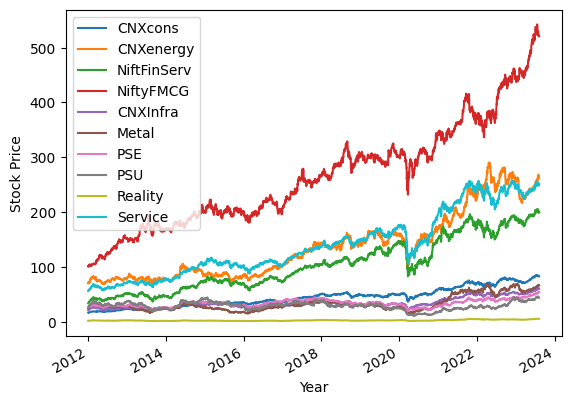

In [23]:
data.iloc[:,1:12].plot()
plt.xlabel('Year')
plt.ylabel('Stock Price')

plt.show()

In [11]:
date=data.iloc[:,0]
date.head()

0    02-01-2012
1    03-01-2012
2    04-01-2012
3    05-01-2012
4    06-01-2012
Name: Date, dtype: object

In [12]:
cmp1=data.iloc[:,1]
cmp1.head()

0    33.561001
1    34.140500
2    33.861001
3    34.267500
4    34.160000
Name: Auto, dtype: float64

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])


# Set the 'date' column as the index of the DataFrame
data = data.set_index('Date')

# Plot the data
data.plot()

# Display the plot
plt.show()

In [ ]:
x=data.iloc[:,0]
y=data.iloc[:,1:12]
plt.plot(x,y,xlabel="Year",ylabel="Stock Price")
plt.show()